# 霍夫检测

霍夫检测是一种常用的检测固定形状的手段.

霍夫检测实际上是把原始图像变换到霍夫空间. 霍夫空间是一种参数空间, 一般使用极坐标空间.

在图像空间中的一个方程$\rho=x\cos{\theta} + y\sin{\theta}$变换到霍夫空间就变成了一个点$(\rho_0,\theta_0)$.

那么, 如果图像中有一条直线(这条直线可能是断断续续的), 变换到霍夫空间就变成了由很多线相交形成的点. 那么我们在霍夫空间观察到的点在图像中很有可能就是一条比较连续的直线.

我们可以先对一条直线做Canny边缘检测(详见[filter.ipynb](filter.ipynb)), 然后做霍夫检测, 提取图像中一些形状, 例如矩形.

In [4]:
import utils

import numpy as np

import cv2

import matplotlib.pyplot as plt

下面以一副简单的手拿手机的图片为例子, 我们的目标是检测出图像中的手机边框.

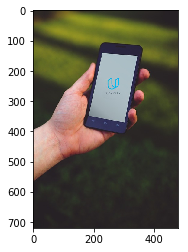

In [2]:
image = utils.imread('images/phone.jpg')

plt.imshow(image)

先进行边缘检测, 提取出图像中的边界.

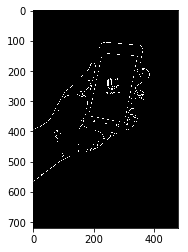

In [11]:
gray = utils.rgb2gray(image)

low = 50
high = 120

edges = cv2.Canny(gray, low, high)

plt.imshow(edges, cmap='gray')

接下来是关键的一步, 使用霍夫检测查找图片中的直线.

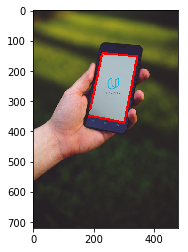

In [12]:
# 霍夫变换的一些参数
rho = 1
theta = np.pi / 180
threshold = 60  # 交线数量大于这个值才会被认定为直线, 用于控制检测的灵敏度
min_line_length = 110  # 线条的最小长度
max_line_gap = 5  # 线条分段之间的最大距离

line_image = np.copy(image)

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                       min_line_length, max_line_gap)

# 在原始图像中显示图片
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)
        
plt.imshow(line_image)